In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("cuemath_cleaned_data.csv")
df.head()

,student_id,name,age,quiz_score,city,Enrollment_Date,Last_Login,course_enrolled,weekly_progress(%),final_grade,tutor_name,feedback_score,active_status,tutor_id,grade,time_spent_minutes,parent_rating
0,10000,Riya Chaudry,11,63,Bangalore,5-1-2025,17-05-2025,Probability,91.92,79.2,Mr. Manish,3,No,TUT010,1,77.00,2
1,10001,Vaibhav Bajaj,15,91,Mumbai,19-03-2025,4-3-2025,Probability,8.90,68.5,Guest_lecture,1,Yes,TUT042,4,89.00,5
2,10002,Anya Khurana,5,39,Hyderabad,22-02-2025,16-03-2025,Algebra Basics,39.83,62.7,Guest_lecture,5,No,TUT027,10,398.30,3
3,10003,Anvi Divan,11,97,Mumbai,5-7-2025,6-1-2025,Math Puzzles,39.50,58.4,Mr. Manish,3,Yes,TUT025,5,151.71,3
4,10004,Prisha Maharaj,11,71,Pune,26-01-2025,29-01-2025,Calculus Intro,18.63,67.8,Ms. Priya,3,Yes,TUT016,12,6.00,2


In [ ]:
1.Average quiz score and final grade by city and course enrolled

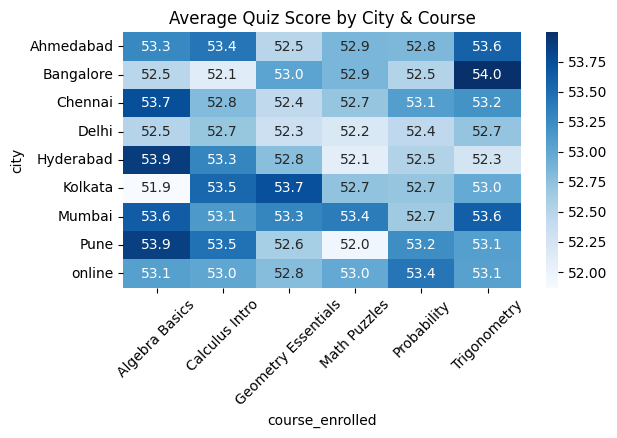

In [19]:
grouped = df.groupby(['city','course_enrolled'])[['quiz_score','final_grade']].mean().reset_index()
pivot = grouped.pivot(index='city', columns='course_enrolled', values='quiz_score')
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Blues')
plt.title('Average Quiz Score by City & Course')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
2.Correlation between time spent and weekly progress/final grades

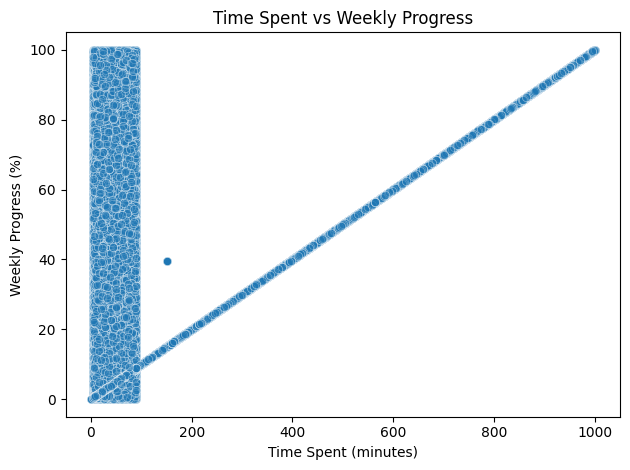

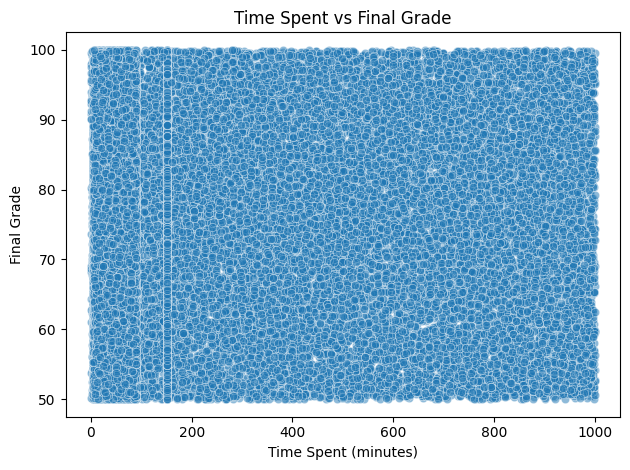

Correlation (Time vs Weekly Progress): 0.4007588788949236
Correlation (Time vs Final Grade): 3.27478251636282e-05


In [20]:
sns.scatterplot(x='time_spent_minutes', y='weekly_progress(%)', data=df, alpha=0.5)
plt.title('Time Spent vs Weekly Progress')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Weekly Progress (%)')
plt.tight_layout()
plt.show()

sns.scatterplot(x='time_spent_minutes', y='final_grade', data=df, alpha=0.5)
plt.title('Time Spent vs Final Grade')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Final Grade')
plt.tight_layout()
plt.show()

# Correlation values
print("Correlation (Time vs Weekly Progress):",df['time_spent_minutes'].corr(df['weekly_progress(%)']))
print("Correlation (Time vs Final Grade):",df['time_spent_minutes'].corr(df['final_grade']))


In [ ]:
3.Tutors with highest average feedback and parent ratings

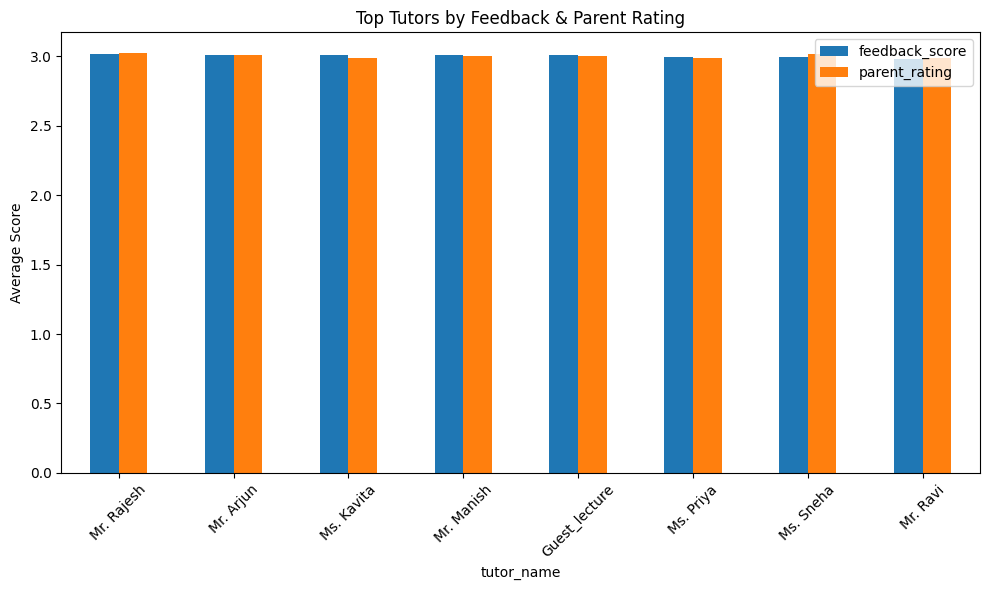

In [22]:
top_tutors = df.groupby('tutor_name')[['feedback_score', 'parent_rating']].mean().sort_values(by='feedback_score', ascending=False).head(10)
top_tutors.plot(kind='bar', figsize=(10,6))
plt.title('Top Tutors by Feedback & Parent Rating')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
4.Distribution of active vs inactive students by city and grade

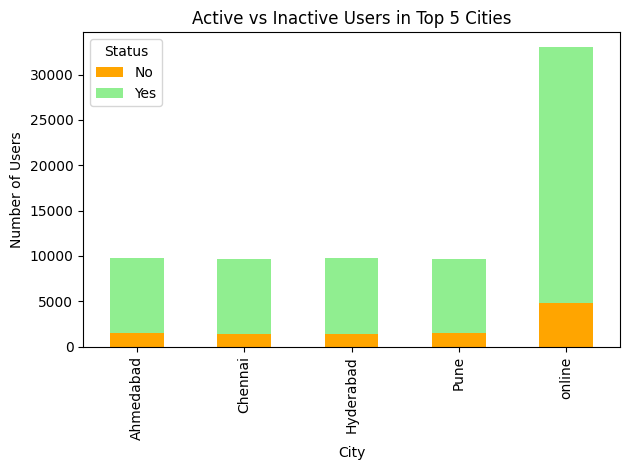

In [24]:
# Get top 5 cities by count
top_cities = df['city'].value_counts().head(5).index

# Filter the DataFrame for those cities
filtered_df = df[df['city'].isin(top_cities)]

# Count active/inactive users in each city
status_counts = pd.crosstab(filtered_df['city'], filtered_df['active_status'])

# Plot it
status_counts.plot(kind='bar', stacked=True, color=['orange', 'lightgreen'])

plt.title('Active vs Inactive Users in Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [ ]:
5.Correlation between feedback score and parent rating

In [ ]:
6.Enrollment and activity trends over time (monthly)

In [30]:
df.describe()

,student_id,age,quiz_score,weekly_progress(%),final_grade,feedback_score,grade,time_spent_minutes,parent_rating
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,64999.500000,11.352136,52.968273,39.500539,74.894442,3.002018,6.503055,151.713949,3.001873
std,31754.409143,3.378951,25.644076,30.226722,14.443866,1.348917,3.445420,225.105744,1.350089
min,10000.000000,5.000000,0.000000,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000
25%,37499.750000,10.000000,36.000000,8.300000,62.300000,2.000000,4.000000,34.000000,2.000000
50%,64999.500000,11.000000,55.000000,39.500000,74.900000,3.000000,6.000000,64.000000,3.000000
75%,92499.250000,14.000000,72.000000,64.270000,87.400000,4.000000,9.000000,151.710000,4.000000
max,119999.000000,18.000000,100.000000,100.000000,100.000000,5.000000,12.000000,1000.000000,5.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   student_id          110000 non-null  int64  
 1   name                110000 non-null  object 
 2   age                 110000 non-null  int64  
 3   quiz_score          110000 non-null  int64  
 4   city                110000 non-null  object 
 5   Enrollment_Date     110000 non-null  object 
 6   Last_Login          110000 non-null  object 
 7   course_enrolled     110000 non-null  object 
 8   weekly_progress(%)  110000 non-null  float64
 9   final_grade         110000 non-null  float64
 10  tutor_name          110000 non-null  object 
 11  feedback_score      110000 non-null  int64  
 12  active_status       110000 non-null  object 
 13  tutor_id            110000 non-null  object 
 14  grade               110000 non-null  int64  
 15  time_spent_minutes  110000 non-nul

In [32]:
# Convert dates to datetime
df['Enrollment_Date'] = pd.to_datetime(df['Enrollment_Date'], errors='coerce')
df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')


C:\Users\gurja\AppData\Local\Temp\ipykernel_245452\1431120517.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')


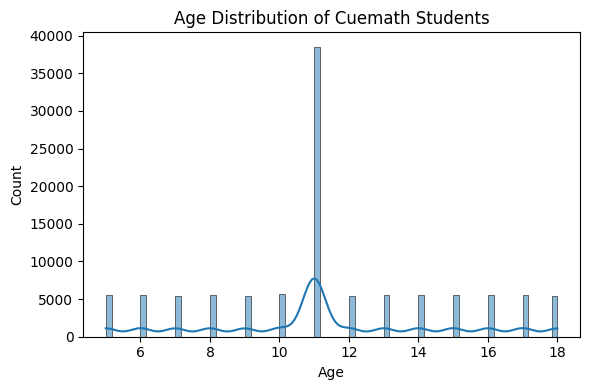

In [38]:
# Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['age'].dropna(), kde=True)
plt.title("Age Distribution of Cuemath Students")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


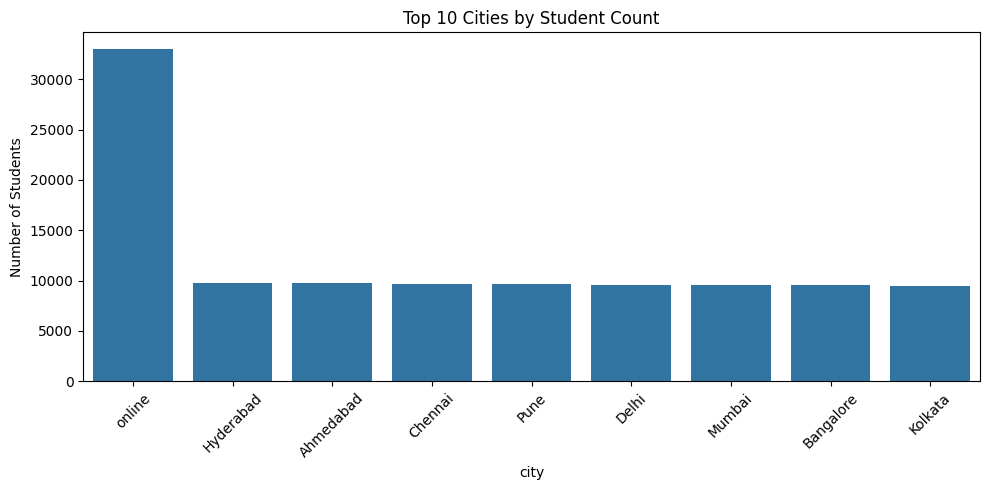

In [39]:
# City-wise student count
plt.figure(figsize=(10, 5))
top_cities = df['city'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Student Count")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

C:\Users\gurja\AppData\Local\Temp\ipykernel_245452\3998112981.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quiz_age = df.groupby('age_group')['quiz_score'].mean().dropna()


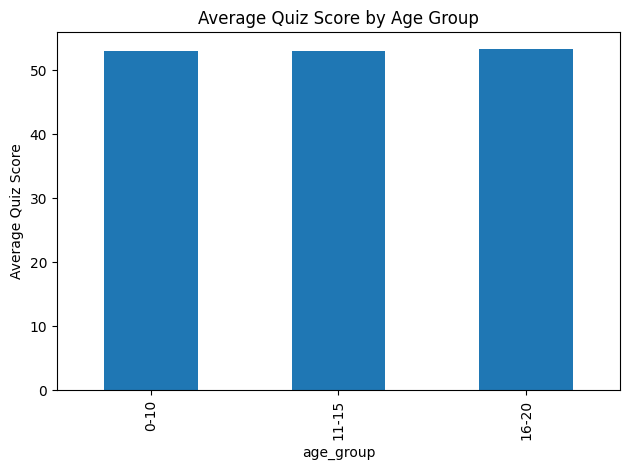

In [40]:
# Average quiz score by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 15, 20, 25, 30], labels=["0-10", "11-15", "16-20", "21-25", "26-30"])
quiz_age = df.groupby('age_group')['quiz_score'].mean().dropna()
quiz_age.plot(kind='bar', title="Average Quiz Score by Age Group")
plt.ylabel("Average Quiz Score")
plt.tight_layout()
plt.show()

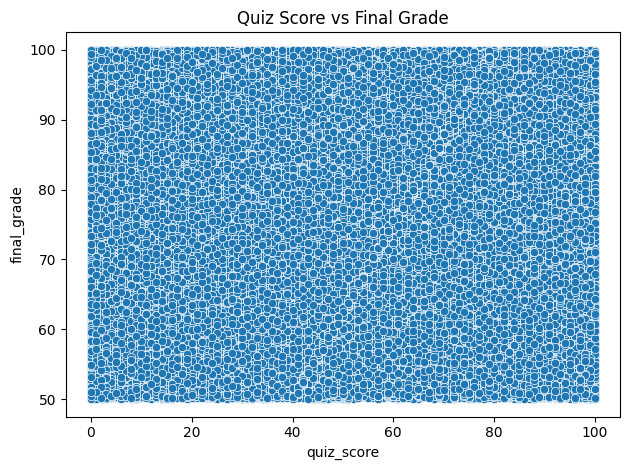

In [41]:
# Correlation between quiz score and final grade
sns.scatterplot(data=df, x="quiz_score", y="final_grade")
plt.title("Quiz Score vs Final Grade")
plt.tight_layout()
plt.show()


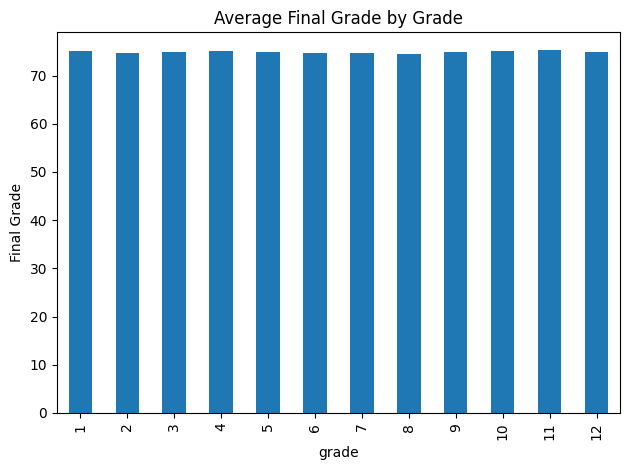

In [43]:
#  Average final grade per class grade
df.groupby("grade")["final_grade"].mean().plot(kind="bar", title="Average Final Grade by Grade")
plt.ylabel("Final Grade")
plt.tight_layout()
plt.show()

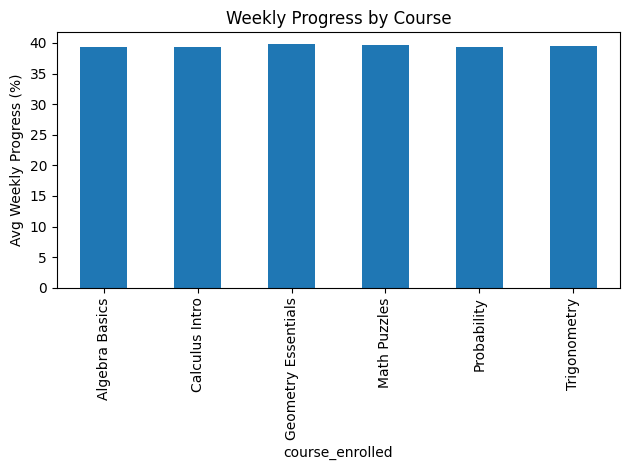

In [44]:
#  Weekly progress by course enrolled
df.groupby("course_enrolled")["weekly_progress(%)"].mean().plot(kind="bar", title="Weekly Progress by Course")
plt.ylabel("Avg Weekly Progress (%)")
plt.tight_layout()
plt.show()


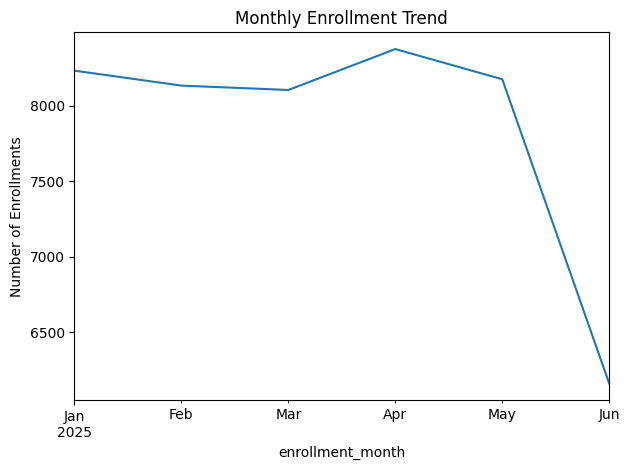

In [46]:
# Enrollment trend over time
df['enrollment_month'] = df['Enrollment_Date'].dt.to_period("M")
df['enrollment_month'].value_counts().sort_index().plot(title="Monthly Enrollment Trend")
plt.ylabel("Number of Enrollments")
plt.tight_layout()
plt.show()

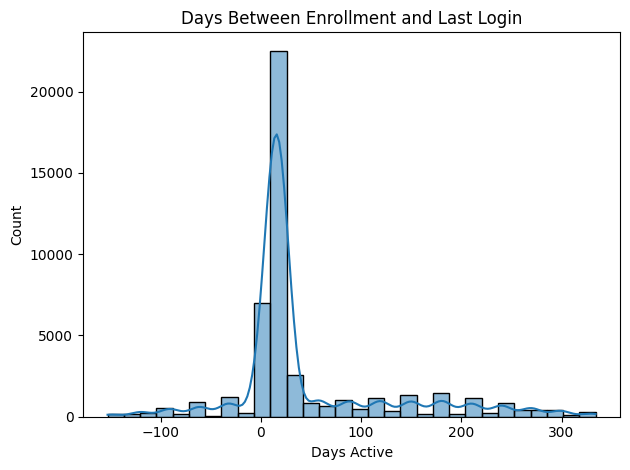

In [47]:

#  Time difference between enrollment and last login
df["days_active"] = (df["Last_Login"] - df["Enrollment_Date"]).dt.days
sns.histplot(df["days_active"].dropna(), bins=30, kde=True)
plt.title("Days Between Enrollment and Last Login")
plt.xlabel("Days Active")
plt.tight_layout()
plt.show()

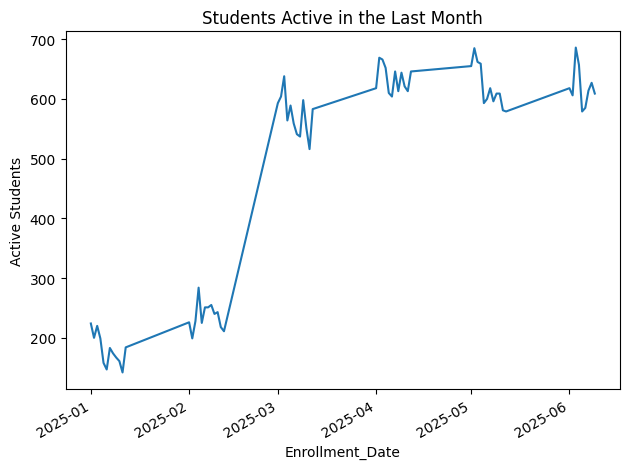

In [48]:

# Recent activity check
recent_cutoff = pd.Timestamp.now() - pd.DateOffset(months=1)
recent = df[df['Last_Login'] >= recent_cutoff]
recent.groupby("Enrollment_Date").size().plot(title="Students Active in the Last Month")
plt.ylabel("Active Students")
plt.tight_layout()
plt.show()

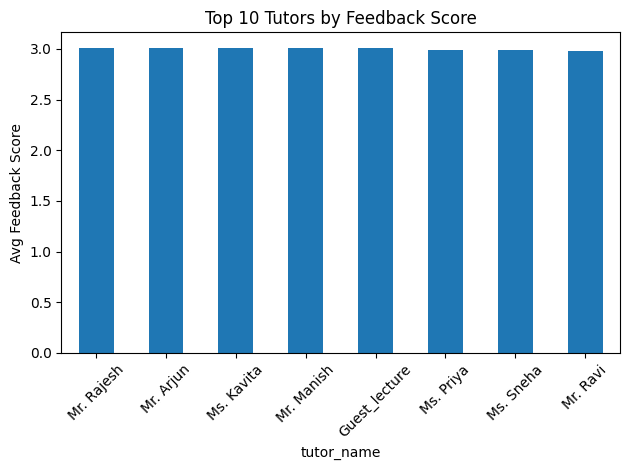

In [49]:
#  Avg feedback per tutor
tutor_feedback = df.groupby("tutor_name")["feedback_score"].mean().dropna().nlargest(10)
tutor_feedback.plot(kind='bar', title="Top 10 Tutors by Feedback Score")
plt.ylabel("Avg Feedback Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


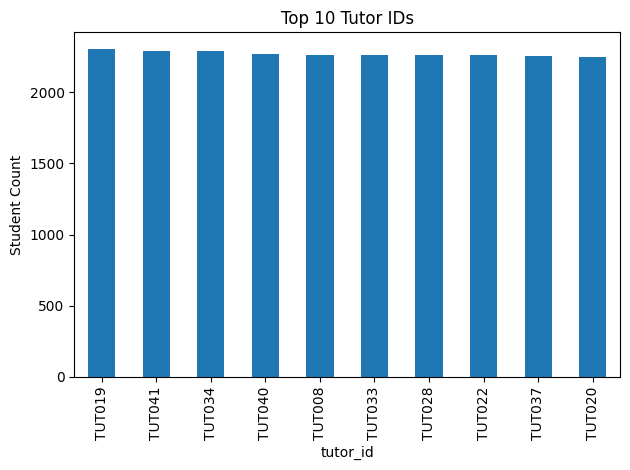

In [51]:
#  Distribution of tutor IDs
df["tutor_id"].value_counts().nlargest(10).plot(kind="bar", title="Top 10 Tutor IDs")
plt.ylabel("Student Count")
plt.tight_layout()
plt.show()


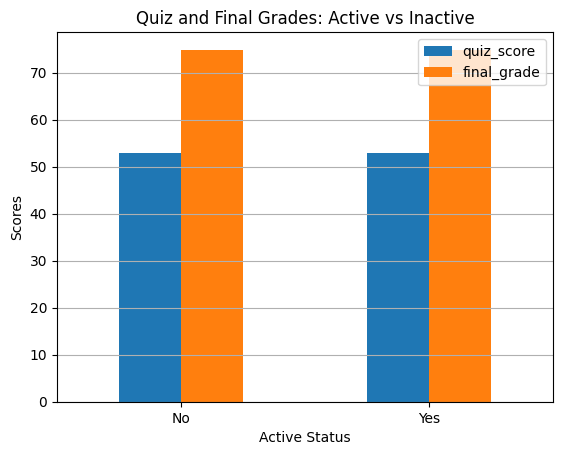

In [58]:
df.groupby("active_status")[["quiz_score", "final_grade"]].mean().plot(kind="bar")
plt.title("Quiz and Final Grades: Active vs Inactive")
plt.ylabel("Scores")
plt.xlabel("Active Status")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


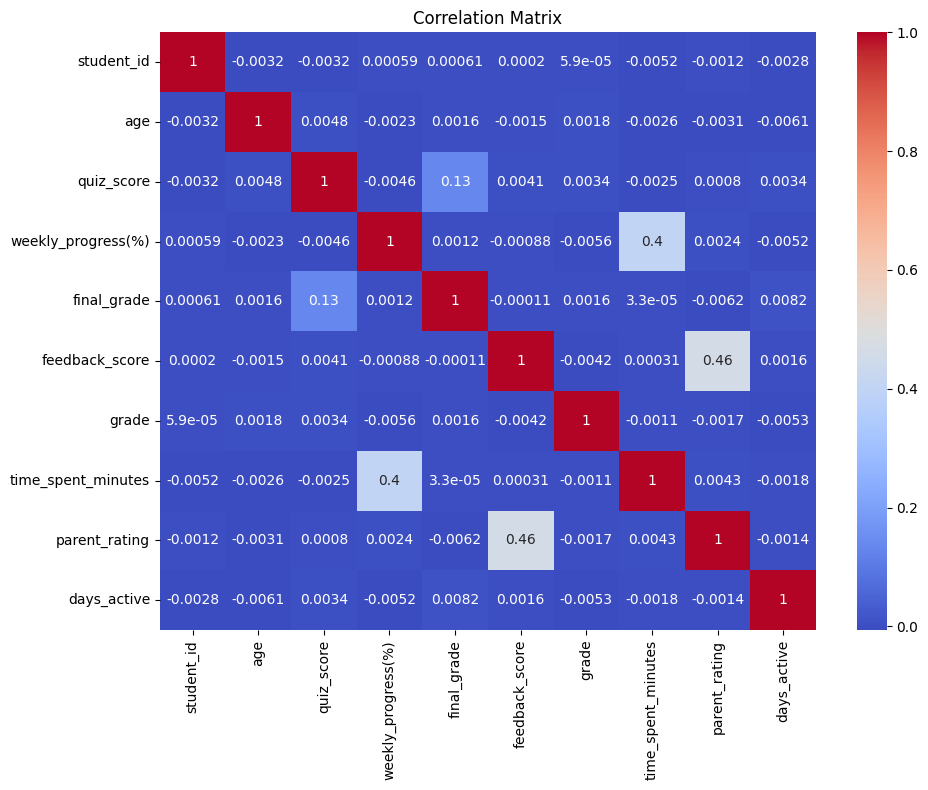

In [55]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

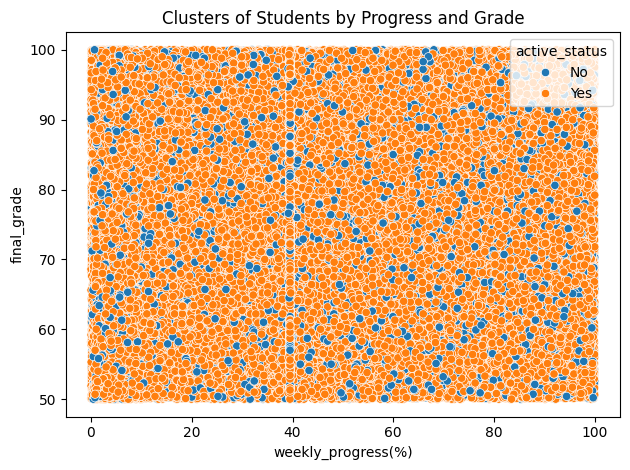

In [56]:
#  Cluster-like insight (using scatter of two main features)
sns.scatterplot(data=df, x="weekly_progress(%)", y="final_grade", hue="active_status")
plt.title("Clusters of Students by Progress and Grade")
plt.tight_layout()
plt.show()


In [57]:
#  Missing value check vs performance
missing_parents = df[df["parent_rating"].isna()]
print("Average final grade for students with missing parent_rating:", missing_parents["final_grade"].mean())


Average final grade for students with missing parent_rating: nan


# Here is the description what i has analyzed from dataset

In [ ]:
 Key Insights from Cuemath India Dataset (via EDA)
Student Engagement: Majority of students are active users, with significant time spent on the platform.

Top Tutor: Tutor ID tut019 has the highest number of enrolled students, indicating strong engagement or popularity.

Most Rated Tutor: Mr. Manish received the highest number of feedback scores and parent ratings, highlighting high-quality instruction.

Seasonal Trends:

May sees the highest student activity.

April has the maximum enrollments, while June shows a noticeable decline.

Course Popularity: "Geometry Essentials" is the most enrolled course across users.

Age Demographics: The 11–15 age group dominates the platform's user base.

Location-Based Engagement:

Students from Online mode are more prevalent and active compared to physical cities.

Bangalore students perform best in Trigonometry (Quiz Scores).

Pune students have the lowest average scores in Math Puzzles.

Consistent Usage: Many students are regularly using the app, reflecting strong platform stickiness.